<a href="https://colab.research.google.com/github/stargalax/Random-stuff-I-coded-/blob/main/randomstufficoded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q jax[cuda12] jaxlib flax optax


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 20.2 MB/s eta 0:00:00


So discliamers ok, this code is just toy simulation ok i aint physisct or a coding god to do the real deal! i saw this guy (https://youtu.be/8-B6ryuBkCM?si=3zmrB6ZE69S7dzB_) who did better job at the simulation using c++ prolly check his work if u want!

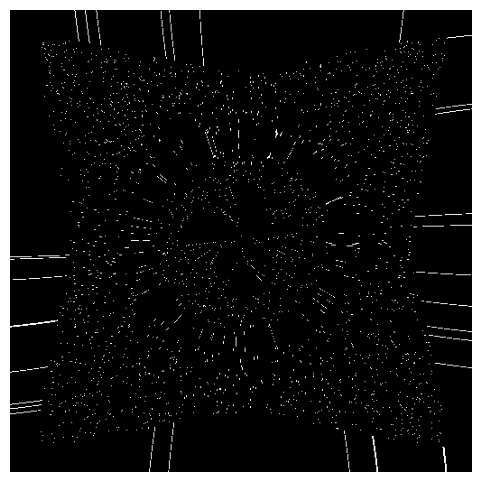

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Image size
h, w = 512, 512

# Generate random star positions
num_stars = 5000
x_stars = np.random.randint(0, w, num_stars)
y_stars = np.random.randint(0, h, num_stars)
stars = np.zeros((h, w, 3))
stars[y_stars, x_stars] = 1.0  # white stars

# Precompute normalized coordinates
X = np.linspace(-1, 1, w)
Y = np.linspace(-1, 1, h)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

# Lensing function
def lens_effect(r, mass=0.2):
    return r + mass / (r + 1e-6)

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('off')
im = ax.imshow(stars)

frames = 60
#animateeee
def update(frame):
    mass = 0.2 + 0.1 * np.sin(frame * 2*np.pi/frames)  # oscillating mass for dynamic effect
    R_lensed = lens_effect(R, mass)
    X_lens = R_lensed * np.cos(theta)
    Y_lens = R_lensed * np.sin(theta)

    # Map back to pixel coordinates
    u = ((X_lens + 1)/2 * (w-1)).astype(int)
    v = ((Y_lens + 1)/2 * (h-1)).astype(int)
    u = np.clip(u, 0, w-1)
    v = np.clip(v, 0, h-1)
    lensed_img = stars[v, u]

    im.set_data(lensed_img)
    return [im]

anim = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)


anim.save("black_hole_lensing.gif", writer=PillowWriter(fps=20))

plt.show()


below code uses a formula α(b)≈c2b4GM​+415π​c4b2(GM)2​ this captures weak and moderate field bending ...i wasnt able to get it as gif yet!

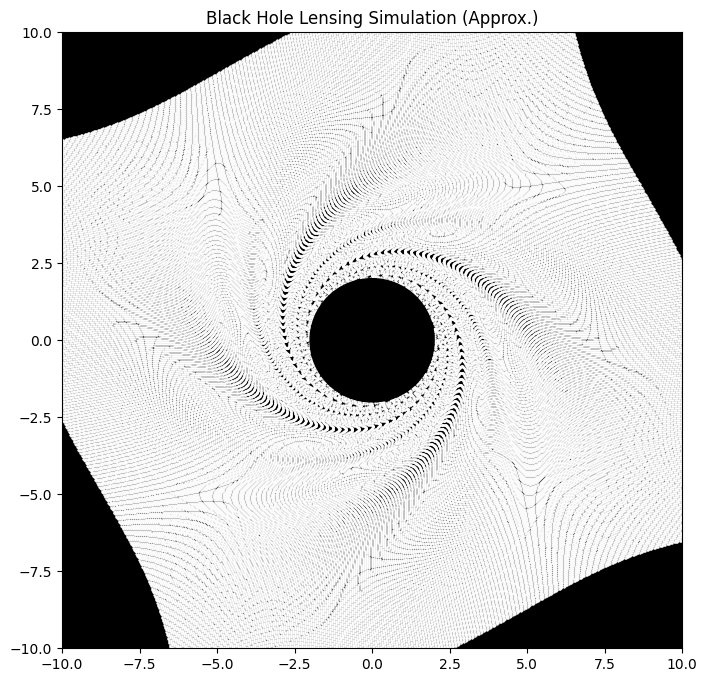

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Black hole parameters
M = 1.0  # mass
BH_radius = 2*M  # Schwarzschild radius (for visual)

# Background grid of light rays (like stars)
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)


r = np.sqrt(X**2 + Y**2)
b = r.copy()  # impact parameter

# Analytic bending angle (2 body thingy cuz the actual forumal is hella crazy)
# alpha = 4M/b + (15*pi/4)*(M^2/b^2)
alpha = 4*M/b + (15*np.pi/4)*(M**2/(b**2))
alpha[r < BH_radius] = np.nan  # rays inside horizon are "swallowed"

# Apply bending: simple angular shift
theta = np.arctan2(Y, X)
theta_deflected = theta + alpha  # deflect light rays by bending angle

# Convert back to Cartesian for visualization
X_deflected = r * np.cos(theta_deflected)
Y_deflected = r * np.sin(theta_deflected)

# Plot
plt.figure(figsize=(8,8))
plt.scatter(X_deflected, Y_deflected, s=0.5, color='white')
circle = plt.Circle((0,0), BH_radius, color='black')
plt.gca().add_artist(circle)
plt.gca().set_facecolor('black')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title("Black Hole Lensing Simulation (Approx.)")
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

def lorenz(x, y, z, dt=0.01):
    dx = sigma*(y - x) * dt
    dy = (x*(rho - z) - y) * dt
    dz = (x*y - beta*z) * dt
    return x + dx, y + dy, z + dz

# Initialize trajectory
num_points = 2000
x = np.zeros(num_points)
y = np.zeros(num_points)
z = np.zeros(num_points)
x[0], y[0], z[0] = 0.1, 0.0, 0.0

# Generate trajectory
for i in range(1, num_points):
    x[i], y[i], z[i] = lorenz(x[i-1], y[i-1], z[i-1])

# Set up figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.set_facecolor('black')
ax.grid(False)
ax.set_axis_off()
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(0, 50)

# Line for the trajectory
line, = ax.plot([], [], [], lw=1, color='cyan')
tail = 100  # number of points visible

# Animation function
def update(frame):
    start = max(0, frame-tail)
    line.set_data(x[start:frame], y[start:frame])
    line.set_3d_properties(z[start:frame])
    return line,

# Create animation
anim = FuncAnimation(fig, update, frames=num_points, interval=10, blit=True)

# Save as GIF
writer = PillowWriter(fps=20)
anim.save("butterfly_effect.gif", writer=writer)

plt.close()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Lorenz system parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

def lorenz(x, y, z, dt=0.01):
    dx = sigma*(y - x) * dt
    dy = (x*(rho - z) - y) * dt
    dz = (x*y - beta*z) * dt
    return x + dx, y + dy, z + dz

# Initialize trajectory
num_points = 2000
x = np.zeros(num_points)
y = np.zeros(num_points)
z = np.zeros(num_points)
x[0], y[0], z[0] = 0.1, 0.0, 0.0

# Generate trajectory
for i in range(1, num_points):
    x[i], y[i], z[i] = lorenz(x[i-1], y[i-1], z[i-1])

# Set up figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.set_facecolor('black')
ax.grid(False)
ax.set_axis_off()
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(0, 50)

# Faint full path
full_line, = ax.plot(x, y, z, lw=1, color='gray', alpha=0.2)

# Moving head and tail
tail_length = 50  # number of points in trail
trail_line, = ax.plot([], [], [], lw=2, color='cyan', alpha=0.8)
head, = ax.plot([], [], [], 'o', color='cyan', markersize=4)

# Animation function
def update(frame):
    start = max(0, frame - tail_length)
    trail_line.set_data(x[start:frame], y[start:frame])
    trail_line.set_3d_properties(z[start:frame])

    # head point
    head.set_data([x[frame]], [y[frame]])
    head.set_3d_properties([z[frame]])

    # slowly rotate view
    ax.view_init(elev=30, azim=frame*0.3)
    return trail_line, head, full_line

# Create animation
anim = FuncAnimation(fig, update, frames=num_points, interval=10, blit=True)

# Save as GIF
writer = PillowWriter(fps=20)
anim.save("butterfly_effect_trail.gif", writer=writer)

plt.close()
